### Absolution vs Relative ###

By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of the proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

In [115]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the csv file as a panda DataFrame, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(type(pokemon))
print(pokemon.shape)
pokemon.head(10)




<class 'pandas.core.frame.DataFrame'>
(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


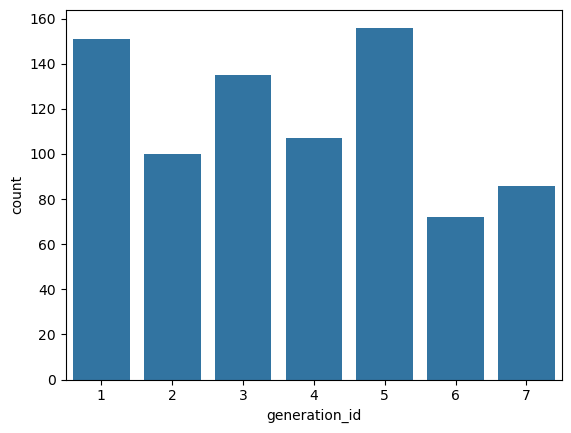

In [116]:
sb.countplot(pokemon, x='generation_id')
plt.show()

In [117]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Data Wrangling! [melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) names row(s) as keys, and unpivots the DataFrame ###

kind of like 'normalizing' 1:N relationships

It will increase the number of rows

just specify the variables to be used a values


In [118]:

# unpivot DataFrame from wide to long format
pkmn_types = pokemon.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')

print(type(pkmn_types))
print(pkmn_types.shape)
pkmn_types.head()


<class 'pandas.core.frame.DataFrame'>
(1614, 4)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


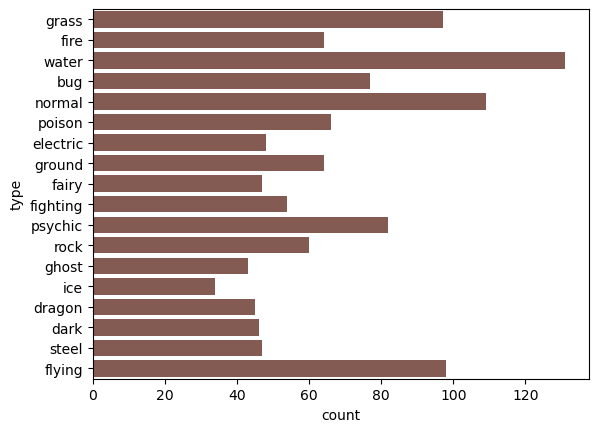

In [119]:
base_color = sb.color_palette()[5]
sb.countplot(data=pkmn_types, y='type', color=base_color)
plt.show()

In [120]:
# returns the values as a panda Series in descending order
type_counts = pkmn_types['type'].value_counts()

print(type(type_counts))
print(type_counts.iloc[0])
type_counts

<class 'pandas.core.series.Series'>
131


type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64

In [121]:
# Get just the unique values of the `type` column from the Series, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object', name='type')

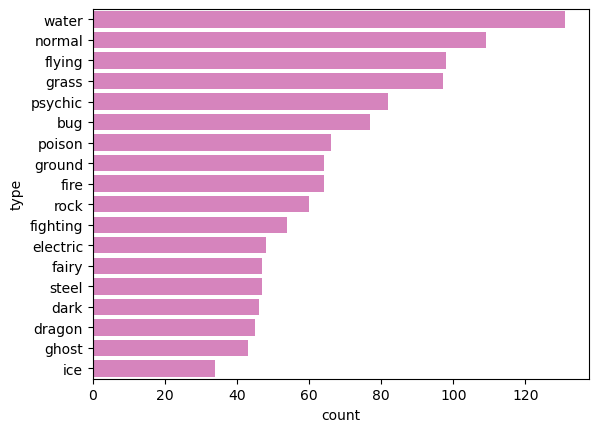

In [122]:
base_color = sb.color_palette()[6]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
plt.show()

### plot relative values instead of counts ###

In [123]:
# Sum all the counts, to get a denominator
n_pokemon = pkmn_types['type'].value_counts().sum()
print(n_pokemon)


1212


In [124]:
# Return the highest frequency in the `type` column, to set the highest number
max_type_count = type_counts.iloc[0]
print(max_type_count)



131


In [125]:
# What percentage is the largest bar of the total count? This will calulate the percent value of the largest 
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [126]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [127]:
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

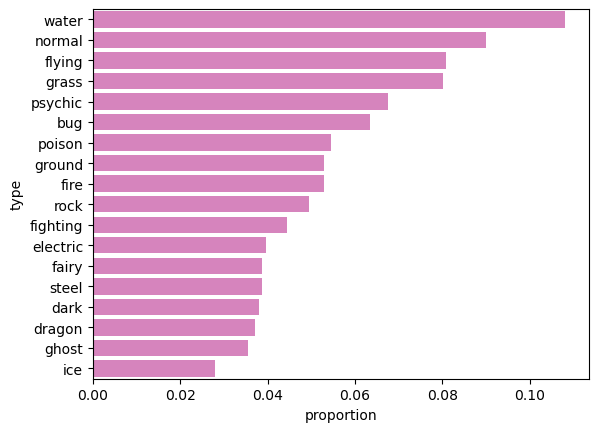

In [131]:
# create the bar chart
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

#  The first argument takes the tick locations. in this case, the tick proportions multiplied back to be on the scale of counts
#  The second argument takes the tick names
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');
plt.show()


### print the values on the bars ###


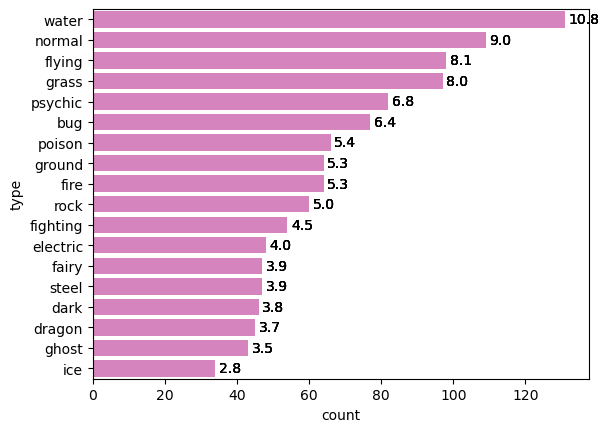

In [138]:

sb.countplot(data=pkmn_types, y='type', order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    
    count = type_counts.iloc[i]

    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)

    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

plt.show()